In [2]:
import pandas as pd
import seaborn as sns

file_path = "diabetes (1).csv"
data = pd.read_csv(file_path)

selected_columns = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction", "Outcome"]
data_selected = data[selected_columns]

# Cek missing value
print("Jumlah missing value per kolom:")
print(data_selected.isnull().sum())

# Drop missing value
data_clean = data_selected.dropna()


Jumlah missing value per kolom:
Glucose                     0
BMI                         0
Age                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64


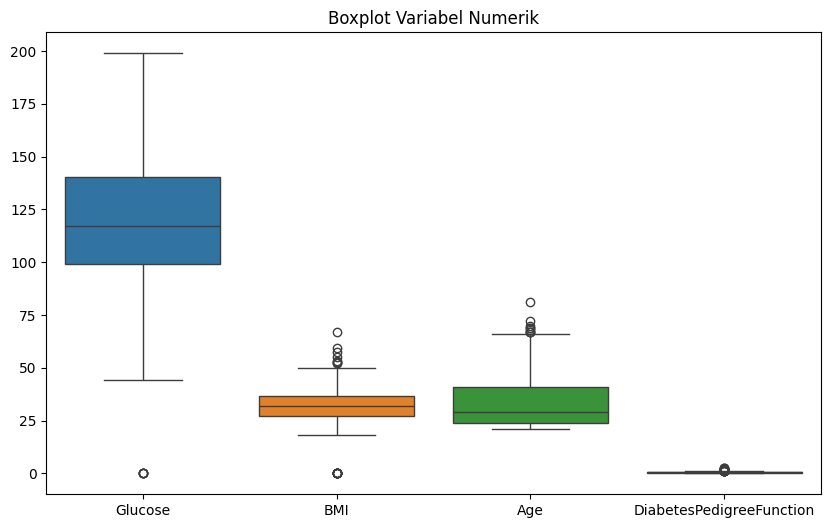

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_clean.drop(columns="Outcome"))
plt.title("Boxplot Variabel Numerik")
plt.show()

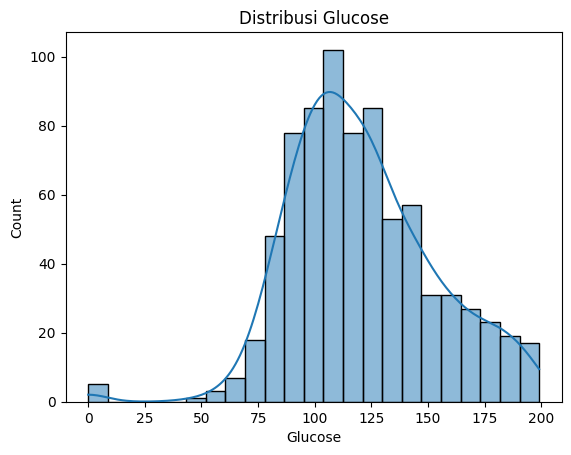

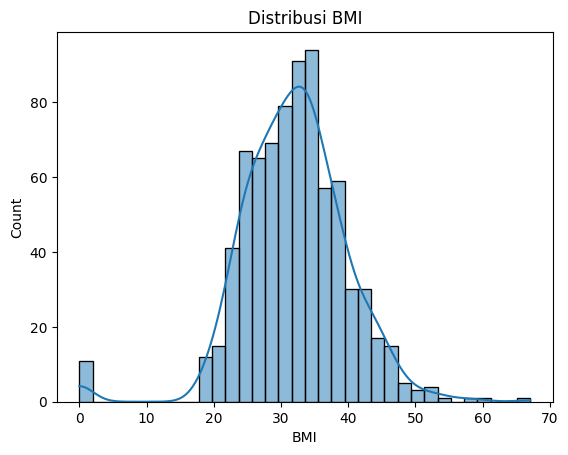

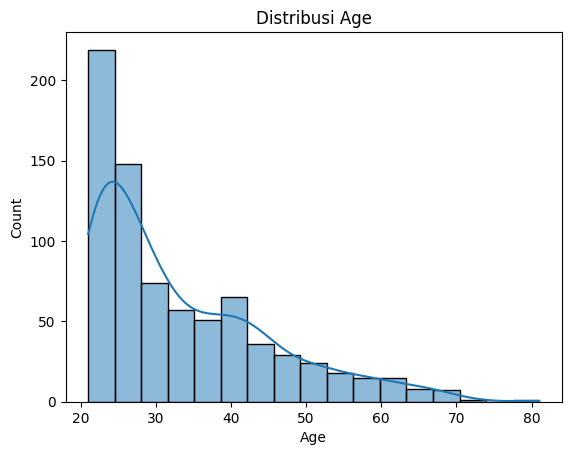

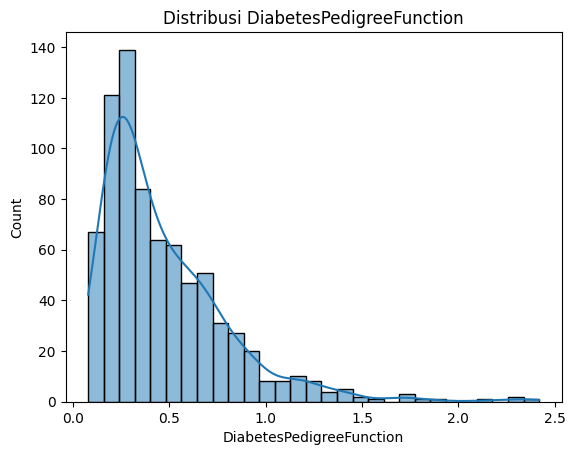

In [4]:
for col in ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]:
    plt.figure()
    sns.histplot(data_clean[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean.drop(columns="Outcome"))
X_scaled = pd.DataFrame(X_scaled, columns=["Glucose","BMI","Age","DiabetesPedigreeFunction"])

X_scaled.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,0.848324,0.204013,1.425995,0.468492
1,-1.123396,-0.684422,-0.190672,-0.365061
2,1.943724,-1.103255,-0.105584,0.604397
3,-0.998208,-0.494043,-1.041549,-0.920763
4,0.504055,1.409746,-0.020496,5.484909


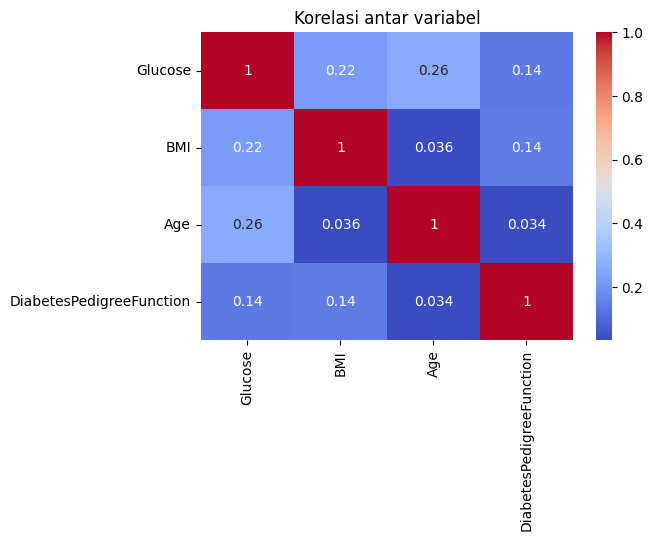

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(data_clean.drop(columns="Outcome").corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar variabel")
plt.show()

In [7]:
print("Distribusi Outcome:")
print(data_clean["Outcome"].value_counts())

Distribusi Outcome:
Outcome
0    500
1    268
Name: count, dtype: int64


In [8]:
data_clean.to_csv("data_clean.csv", index=False)